         Date       Oil 
0  01-02-2008   49091.06
1  01-03-2008   83361.26
2  01-04-2008   74532.45
3  01-05-2008  125478.56
4  01-06-2008  143786.85
          ds          y
0 2008-01-02   49091.06
1 2008-01-03   83361.26
2 2008-01-04   74532.45
3 2008-01-05  125478.56
4 2008-01-06  143786.85


17:03:06 - cmdstanpy - INFO - Chain [1] start processing
17:03:08 - cmdstanpy - INFO - Chain [1] done processing


             ds           yhat     yhat_lower     yhat_upper
0    2008-01-02  143475.037383  101677.925099  182977.962433
1    2008-01-03  170144.625838  131092.768092  210048.877038
2    2008-01-04  153613.710082  114547.580862  194132.163623
3    2008-01-05  160860.035571  119285.220822  200318.180998
4    2008-01-06  160414.268697  120138.644911  199191.061883
...         ...            ...            ...            ...
1891 2018-01-07   38384.385727 -148046.699966  237186.128648
1892 2018-01-08   39754.735451 -149490.185039  251171.187391
1893 2018-01-09   40260.781968 -153979.296044  257092.806831
1894 2018-01-10   34698.178037 -139213.391562  235290.356709
1895 2018-01-11   43892.644825 -179500.176204  281996.580703

[1896 rows x 4 columns]


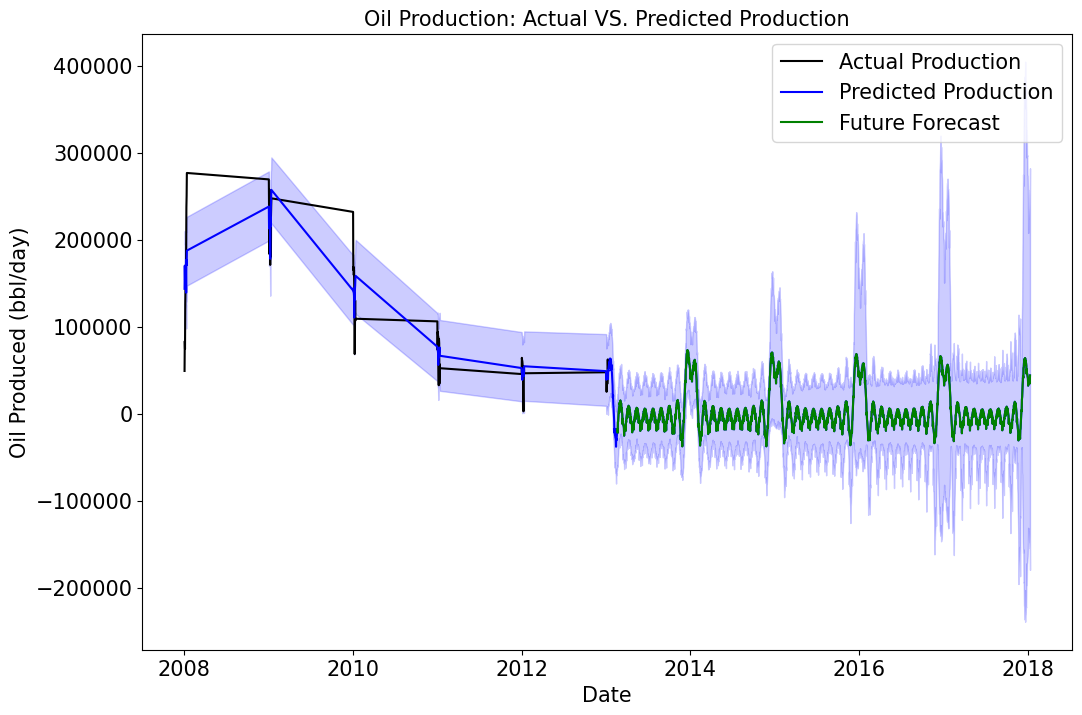

In [9]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt

# Load the data
csv_path = 'Volve prophet.csv'
df = pd.read_csv(csv_path)

# Display the first few rows of the dataframe
print(df.head())

# Rename columns to match Prophet's expectations
df.rename(columns={'Date': 'ds', 'Oil ': 'y'}, inplace=True)

# Ensure the date column is in datetime format
df['ds'] = pd.to_datetime(df['ds'])

# Display the first few rows to verify the changes
print(df.head())

# Initialize the Prophet model with specified parameters
model = Prophet(seasonality_mode='multiplicative', changepoint_prior_scale=0.2, interval_width=0.75)

# Fit the model using all the data
model.fit(df)

# Create a future dataframe for predictions (predicting for an additional 5 years)
future = model.make_future_dataframe(periods=5*365)  # Add 1825 days for 5 years

# Use the model to make a forecast
forecast = model.predict(future)

# Display the forecast
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']])

# Save the forecast to a CSV file
forecast.to_csv('forecast.csv', index=False)

# Plot forecast
plt.figure(figsize=(12,8))

# Plot the actual production data
plt.plot(df['ds'], df['y'], label='Actual Production', color='black')

# Plot the forecasted production data
plt.plot(forecast['ds'], forecast['yhat'], label='Predicted Production', color='blue')

# Highlight the future forecast in a different color
plt.plot(forecast['ds'][len(df):], forecast['yhat'][len(df):], label='Future Forecast', color='green')

# Fill between the forecasted upper and lower bounds
plt.fill_between(forecast['ds'], forecast['yhat_lower'], forecast['yhat_upper'], color='blue', alpha=0.2)

# Labels and title
plt.xlabel('Date', fontsize=15)
plt.ylabel('Oil Produced (bbl/day)', fontsize=15)
plt.legend(loc='upper right', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title('Oil Production: Actual VS. Predicted Production', fontsize=15)

# Show the plot
plt.show()


         Date       Oil 
0  01-02-2008   49091.06
1  01-03-2008   83361.26
2  01-04-2008   74532.45
3  01-05-2008  125478.56
4  01-06-2008  143786.85
          ds          y
0 2008-01-02   49091.06
1 2008-01-03   83361.26
2 2008-01-04   74532.45
3 2008-01-05  125478.56
4 2008-01-06  143786.85


17:24:43 - cmdstanpy - INFO - Chain [1] start processing
17:24:44 - cmdstanpy - INFO - Chain [1] done processing


          ds           yhat     yhat_lower     yhat_upper
0 2008-01-02  143475.037383  104707.956999  184059.987916
1 2008-01-03  170144.625838  131540.145911  212112.150712
2 2008-01-04  153613.710082  110798.497378  191536.644729
3 2008-01-05  160860.035571  121050.312084  202793.707382
4 2008-01-06  160414.268697  119950.886366  200390.119359


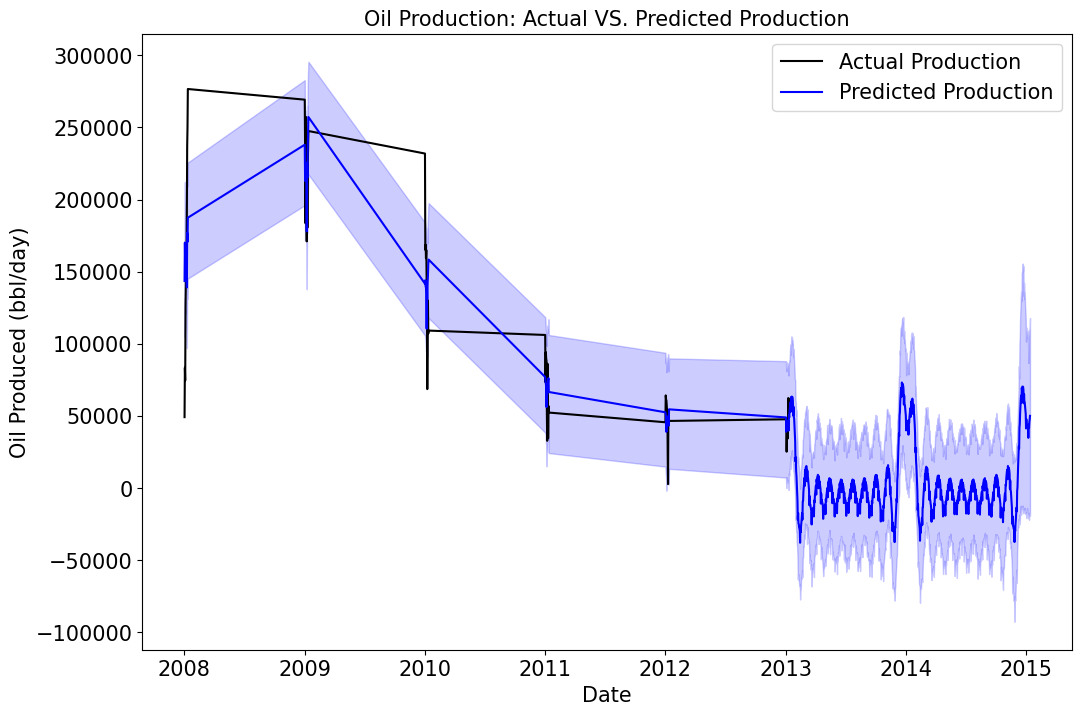

In [13]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt

# Load the data
csv_path = 'Volve prophet.csv'
df = pd.read_csv(csv_path)

# Display the first few rows of the dataframe
print(df.head())

# Rename columns to match Prophet's expectations
df.rename(columns={'Date': 'ds', 'Oil ': 'y'}, inplace=True)

# Ensure the date column is in datetime format
df['ds'] = pd.to_datetime(df['ds'])

# Display the first few rows to verify the changes
print(df.head())

# Initialize and fit the model using all available data
model = Prophet(seasonality_mode='multiplicative', changepoint_prior_scale=0.2, interval_width=0.75)
model.fit(df)

# Prepare future dates for prediction (next 2 years)
future = model.make_future_dataframe(periods=2*365)

# Make predictions
forecast = model.predict(future)

# Summarize the forecast
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head())

# Plot Actual vs Predicted production with confidence intervals
plt.figure(figsize=(12, 8))
plt.plot(df['ds'], df['y'], label='Actual Production', color='black')
plt.plot(forecast['ds'], forecast['yhat'], label='Predicted Production', color='blue')
plt.fill_between(forecast['ds'], forecast['yhat_lower'], forecast['yhat_upper'], color='blue', alpha=0.2)
plt.xlabel('Date', fontsize=15)
plt.ylabel('Oil Produced (bbl/day)', fontsize=15)
plt.legend(loc='upper right', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title('Oil Production: Actual VS. Predicted Production', fontsize=15)
plt.show()


        Date       Oil
0 2014-04-01  11142.47
1 2014-05-01  24901.95
2 2014-06-01  19617.76
3 2014-07-01  15085.68
4 2014-08-01   6970.43
          ds         y
0 2014-04-01  11142.47
1 2014-05-01  24901.95
2 2014-06-01  19617.76
3 2014-07-01  15085.68
4 2014-08-01   6970.43


17:24:53 - cmdstanpy - INFO - Chain [1] start processing
17:24:54 - cmdstanpy - INFO - Chain [1] done processing


           ds         yhat   yhat_lower   yhat_upper
0  2015-03-01  5606.245970  1640.645438  9995.172894
1  2015-04-01  5350.187975  1295.689450  9374.845101
2  2015-05-01  5120.033425  1218.388733  9335.401737
3  2015-06-01  4869.842163   798.378774  9239.145920
4  2015-07-01  4623.625574   466.672890  8602.207780
5  2015-08-01  4370.768552   -99.233742  8722.447760
6  2015-09-01  4126.742993  -164.255603  8441.962787
7  2015-10-01  3885.248663  -360.394677  8106.146209
8  2015-11-01  3634.668121  -468.551495  8286.975474
9  2015-12-01  3389.590040  -775.386153  7448.310433
10 2016-01-01  3147.740065  -872.864798  7466.653137
11 2016-02-01  2898.813232 -1155.720956  7244.728013
12 2016-03-01  2661.602095 -1365.174165  6867.117837
13 2016-04-01  2405.663190 -1479.073226  6853.837044


C:\Users\pande\PycharmProjects\Sample_Project_1\env\Lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
C:\Users\pande\PycharmProjects\Sample_Project_1\env\Lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


<Figure size 800x600 with 0 Axes>

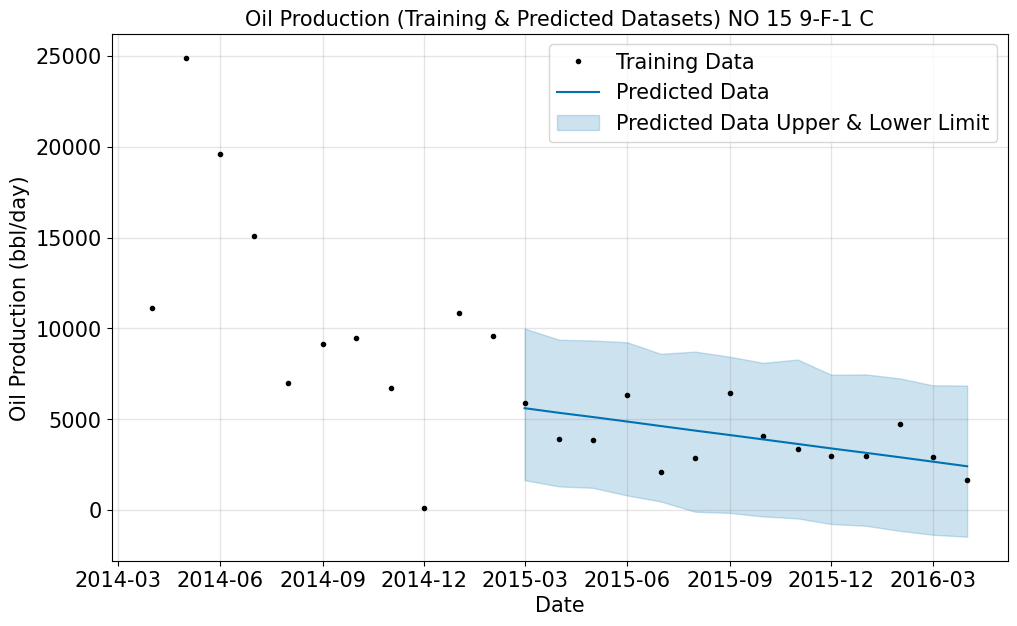

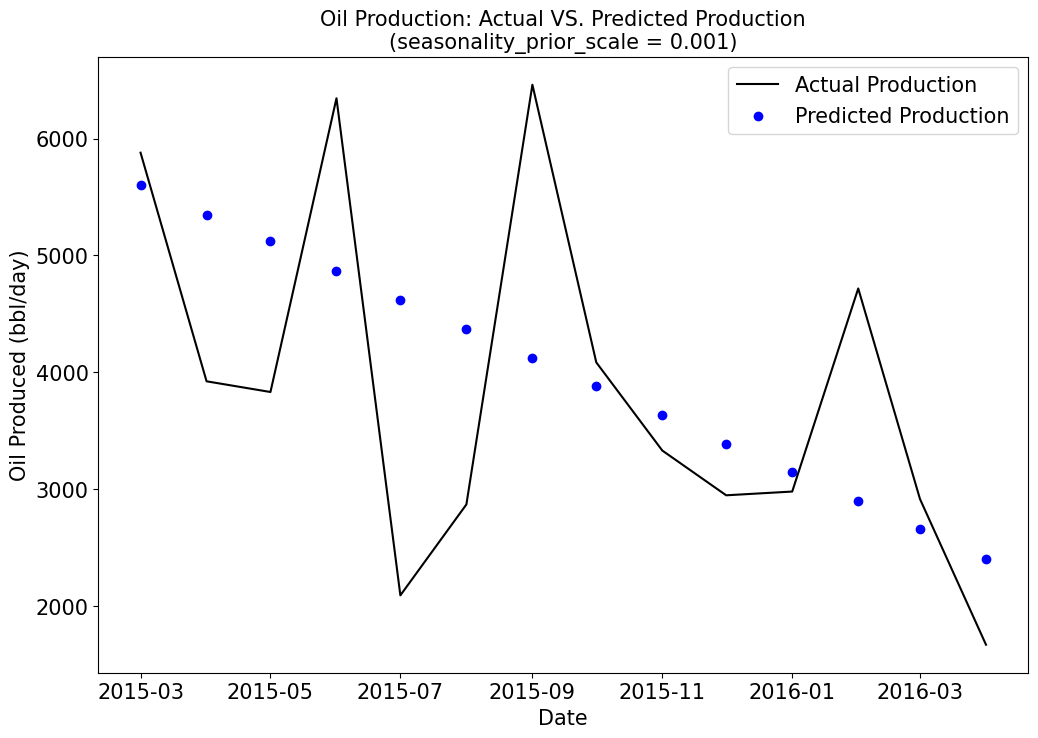

In [14]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt

# Load the data
file_path = 'Volve Well wise data.xlsx'
df_1 = pd.read_excel(file_path, sheet_name="NO 15 9-F-1 C")

# Display the first few rows of the dataframe
print(df_1.head())

# Rename columns to match Prophet's expectations
df_1.rename(columns={'Date': 'ds', 'Oil': 'y'}, inplace=True)

# Ensure the date column is in datetime format
df_1['ds'] = pd.to_datetime(df_1['ds'])

# Display the first few rows to verify the changes
print(df_1.head())

# Initialize and fit the model
model = Prophet(changepoint_prior_scale=1, seasonality_prior_scale=0.001)
model.fit(df_1[:28])

# Prepare for future predictions
future_dates = df_1['ds'][11:].reset_index(drop=True)
future = pd.DataFrame(future_dates)
future.columns = ['ds']
future['ds'] = pd.to_datetime(future['ds'])

# Make predictions
forecast = pd.DataFrame()

for date in future['ds']:
    future_date = pd.DataFrame({'ds': [date]})
    forecast_part = model.predict(future_date)
    
    # Append the forecast_part to the forecast DataFrame
    forecast = pd.concat([forecast, forecast_part], ignore_index=True)
    
    # Check if the predicted value has reached 0
    if forecast_part['yhat'].values[0] <= 0:
        break

# Filter out negative predictions
forecast = forecast[forecast['yhat'] > 0]

# Display the forecasted values
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']])

# Save the forecast to a CSV file
forecast.to_csv('forecast.csv', index=False)

# Plot forecast
plt.figure(figsize=(8,6))
model.plot(forecast)
plt.ylabel('Oil Production (bbl/day)', fontsize=15)
plt.xlabel('Date', fontsize=15)
plt.legend(['Training Data', 'Predicted Data', 'Predicted Data Upper & Lower Limit'], loc='upper right', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title('Oil Production (Training & Predicted Datasets) NO 15 9-F-1 C', fontsize=15)

# Plot Actual vs Predicted production
x1 = forecast['ds']
y1 = forecast['yhat']
y4 = df_1['y'][11:]

plt.figure(figsize=(12,8))
plt.plot(df_1['ds'][11:], y4, label='Actual Production', color='black')
plt.scatter(x1, y1, label='Predicted Production', color='blue')
plt.xlabel('Date', fontsize=15)
plt.ylabel('Oil Produced (bbl/day)', fontsize=15)
plt.legend(loc='upper right', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title('Oil Production: Actual VS. Predicted Production\n(seasonality_prior_scale = 0.001)', fontsize=15)
plt.show()


13:26:05 - cmdstanpy - INFO - Chain [1] start processing


        Date       Oil
0 2013-07-01   3923.08
1 2013-08-01  25496.07
2 2013-09-01  23775.08
3 2013-10-01  34114.50
4 2013-11-01  35386.35
          ds         y
0 2013-07-01   3923.08
1 2013-08-01  25496.07
2 2013-09-01  23775.08
3 2013-10-01  34114.50
4 2013-11-01  35386.35


13:26:05 - cmdstanpy - INFO - Chain [1] done processing


           ds          yhat    yhat_lower    yhat_upper
0  2014-06-01  33661.923355  27041.437809  40807.354263
1  2014-07-01  31863.871059  25481.264746  38110.045215
2  2014-08-01  30018.614611  23501.760051  36560.395501
3  2014-09-01  28178.260670  21743.430837  35172.803587
4  2014-10-01  26403.314675  19593.599352  33593.720947
5  2014-11-01  24549.398723  18569.574181  31048.662768
6  2014-12-01  22737.649265  16401.592758  29474.057729
7  2015-01-01  29733.802281  23353.312865  36480.899160
8  2015-02-01  36687.718372  29545.272069  42960.964272
9  2015-03-01  43013.280661  36554.852120  49489.559041
10 2015-04-01  49994.796566  43341.649837  56350.191766
11 2015-05-01  46839.194575  40537.229268  53645.773233
12 2015-06-01  43569.800422  36652.547464  50167.204113
13 2015-07-01  40400.651426  33744.727922  47043.853986
14 2015-08-01  37139.631174  30700.810744  43880.756261
15 2015-09-01  33883.557209  27342.212846  40187.710836
16 2015-10-01  30738.980105  23887.234887  37520

C:\Users\pande\PycharmProjects\Sample_Project_1\env\Lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
C:\Users\pande\PycharmProjects\Sample_Project_1\env\Lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


<Figure size 800x600 with 0 Axes>

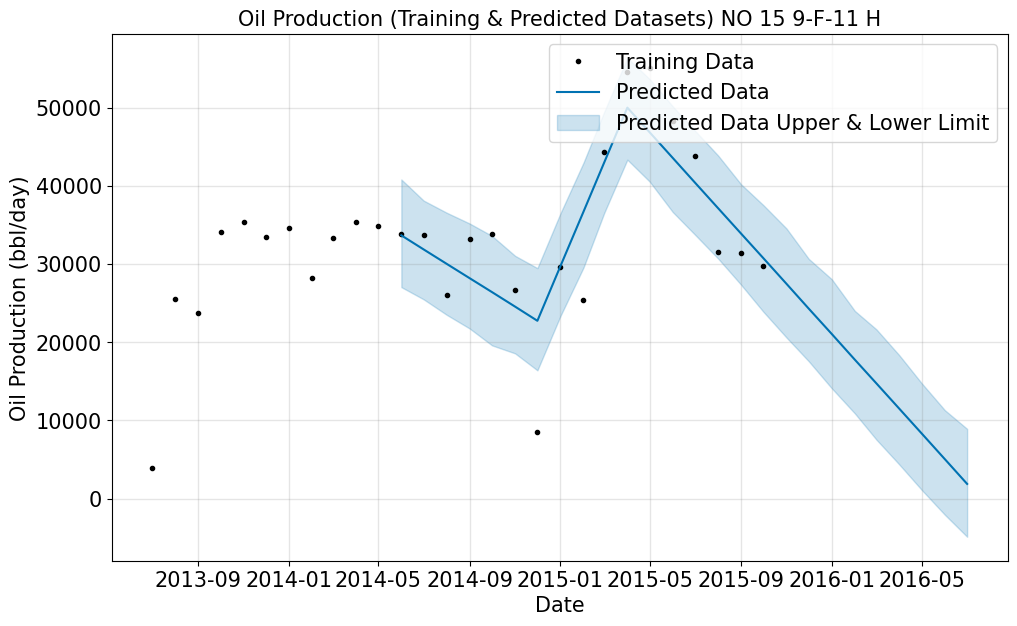

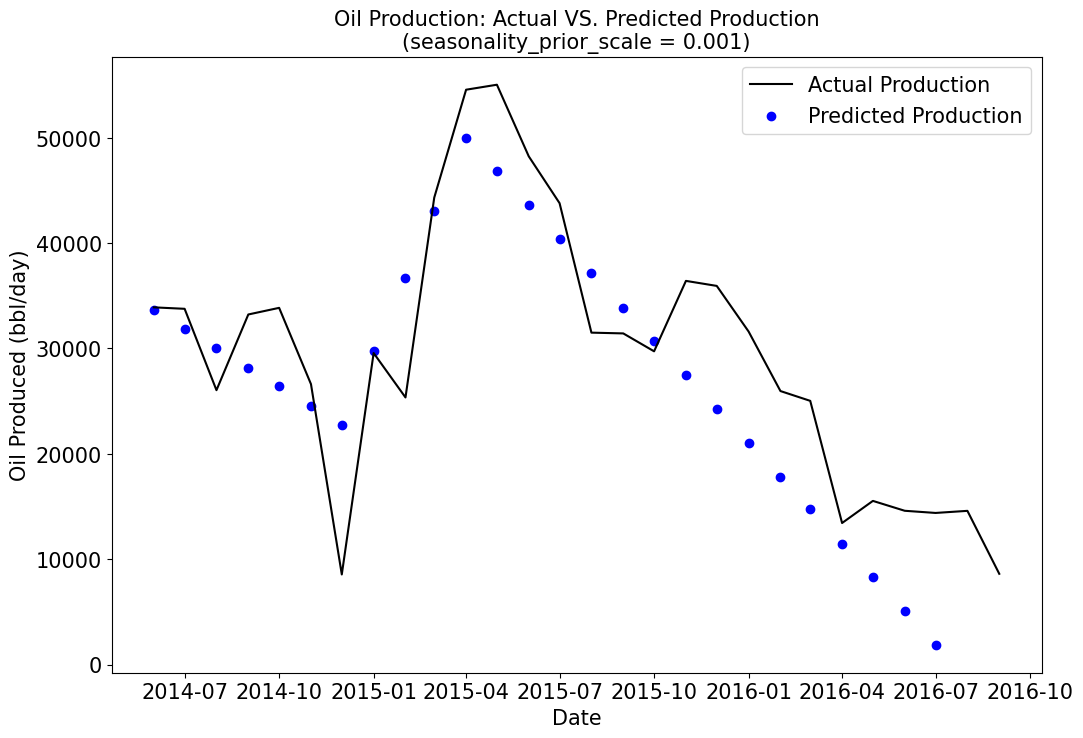

In [86]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt

# Load the data
file_path = 'Volve Well wise data.xlsx'
df_2 = pd.read_excel(file_path, sheet_name="NO 15 9-F-11 H")

# Display the first few rows of the dataframe
print(df_2.head())

# Rename columns to match Prophet's expectations
df_2.rename(columns={'Date': 'ds', 'Oil': 'y'}, inplace=True)

# Ensure the date column is in datetime format
df_2['ds'] = pd.to_datetime(df_2['ds'])

# Display the first few rows to verify the changes
print(df_2.head())

# Initialize and fit the model
model = Prophet(changepoint_prior_scale=1, seasonality_prior_scale=0.001)
model.fit(df_2[:28])

# Prepare for future predictions
future_dates = df_2['ds'][11:].reset_index(drop=True)
future = pd.DataFrame(future_dates)
future.columns = ['ds']
future['ds'] = pd.to_datetime(future['ds'])

# Make predictions
forecast = pd.DataFrame()

for date in future['ds']:
    future_date = pd.DataFrame({'ds': [date]})
    forecast_part = model.predict(future_date)
    
    # Append the forecast_part to the forecast DataFrame
    forecast = pd.concat([forecast, forecast_part], ignore_index=True)
    
    # Check if the predicted value has reached 0
    if forecast_part['yhat'].values[0] <= 0:
        break

# Filter out negative predictions
forecast = forecast[forecast['yhat'] > 0]

# Display the forecasted values
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']])

# Save the forecast to a CSV file
forecast.to_csv('forecast.csv', index=False)

# Plot forecast
plt.figure(figsize=(8,6))
model.plot(forecast)
plt.ylabel('Oil Production (bbl/day)', fontsize=15)
plt.xlabel('Date', fontsize=15)
plt.legend(['Training Data', 'Predicted Data', 'Predicted Data Upper & Lower Limit'], loc='upper right', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title('Oil Production (Training & Predicted Datasets) NO 15 9-F-11 H', fontsize=15)

# Plot Actual vs Predicted production
x1 = forecast['ds']
y1 = forecast['yhat']
y4 = df_2['y'][11:]

plt.figure(figsize=(12,8))
plt.plot(df_2['ds'][11:], y4, label='Actual Production', color='black')
plt.scatter(x1, y1, label='Predicted Production', color='blue')
plt.xlabel('Date', fontsize=15)
plt.ylabel('Oil Produced (bbl/day)', fontsize=15)
plt.legend(loc='upper right', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title('Oil Production: Actual VS. Predicted Production\n(seasonality_prior_scale = 0.001)', fontsize=15)
plt.show()


13:26:07 - cmdstanpy - INFO - Chain [1] start processing


        Date        Oil
0 2008-02-01   49091.06
1 2008-03-01   83361.26
2 2008-04-01   74532.45
3 2008-05-01  125478.56
4 2008-06-01  143786.85
          ds          y
0 2008-02-01   49091.06
1 2008-03-01   83361.26
2 2008-04-01   74532.45
3 2008-05-01  125478.56
4 2008-06-01  143786.85


13:26:07 - cmdstanpy - INFO - Chain [1] done processing


           ds           yhat     yhat_lower     yhat_upper
0  2009-10-01  125493.461340  105594.738543  144950.033457
1  2009-11-01  124677.043157  106020.518401  143827.411842
2  2009-12-01  117805.884146   98116.249809  135852.901360
3  2010-01-01  110665.226102   90600.729252  130703.185158
4  2010-02-01  103353.778819   84713.806976  122800.252899
..        ...            ...            ...            ...
79 2016-05-01    5906.914489  -12802.486800   24999.932304
80 2016-06-01    5808.547023  -14613.822159   25446.369832
81 2016-07-01    5624.220005  -12406.743475   23412.554124
82 2016-08-01    5492.966302  -13024.671090   23107.657305
83 2016-09-01    5343.890052  -13209.770101   23026.800807

[84 rows x 4 columns]


C:\Users\pande\PycharmProjects\Sample_Project_1\env\Lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
C:\Users\pande\PycharmProjects\Sample_Project_1\env\Lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


<Figure size 800x600 with 0 Axes>

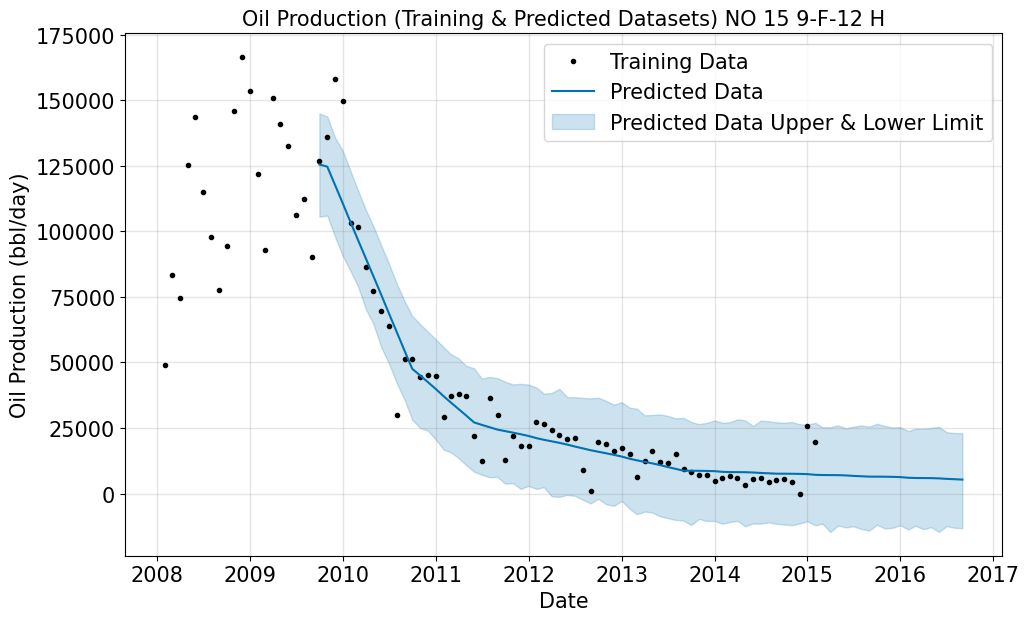

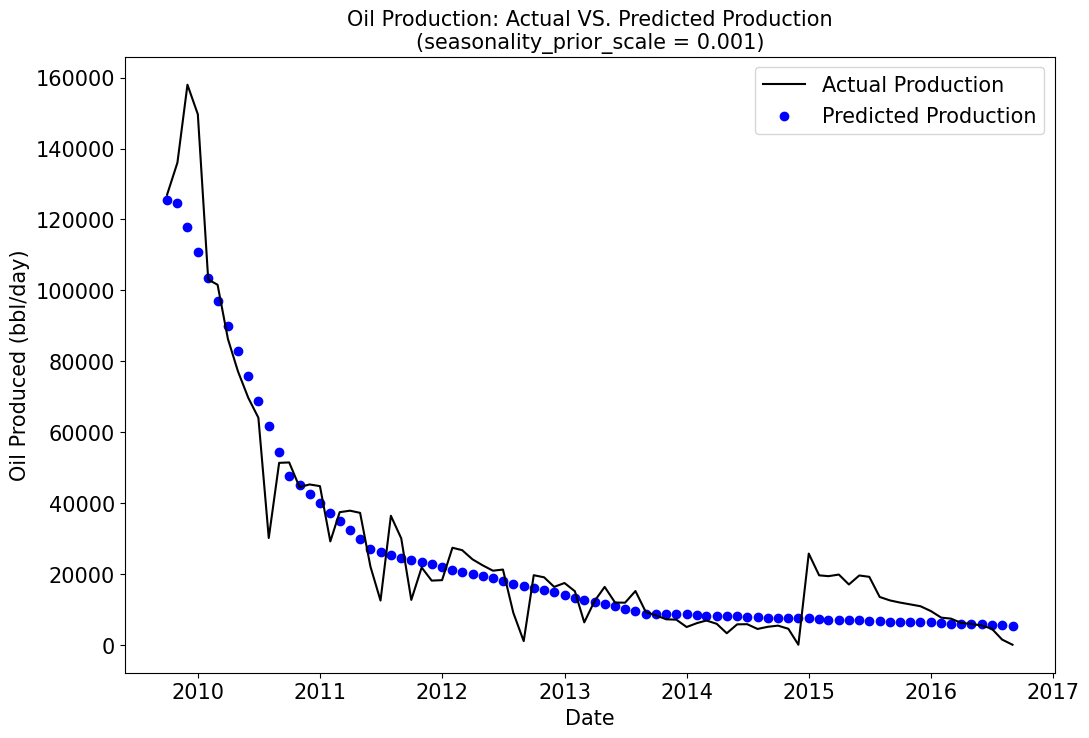

In [87]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt

# Load the data
file_path = 'Volve Well wise data.xlsx'
df_3 = pd.read_excel(file_path, sheet_name="NO 15 9-F-12 H")

# Display the first few rows of the dataframe
print(df_3.head())

# Rename columns to match Prophet's expectations
df_3.rename(columns={'Date': 'ds', 'Oil': 'y'}, inplace=True)

# Ensure the date column is in datetime format
df_3['ds'] = pd.to_datetime(df_3['ds'])

# Display the first few rows to verify the changes
print(df_3.head())

# Initialize and fit the model
model = Prophet(changepoint_prior_scale=1, seasonality_prior_scale=0.001)
model.fit(df_3[:85])

# Prepare for future predictions
future_dates = df_3['ds'][20:].reset_index(drop=True)
future = pd.DataFrame(future_dates)
future.columns = ['ds']
future['ds'] = pd.to_datetime(future['ds'])

# Make predictions
forecast = pd.DataFrame()

for date in future['ds']:
    future_date = pd.DataFrame({'ds': [date]})
    forecast_part = model.predict(future_date)
    
    # Append the forecast_part to the forecast DataFrame
    forecast = pd.concat([forecast, forecast_part], ignore_index=True)
    
    # Check if the predicted value has reached 0
    if forecast_part['yhat'].values[0] <= 0:
        break

# Filter out negative predictions
forecast = forecast[forecast['yhat'] > 0]

# Display the forecasted values
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']])

# Save the forecast to a CSV file
forecast.to_csv('forecast.csv', index=False)

# Plot forecast
plt.figure(figsize=(8,6))
model.plot(forecast)
plt.ylabel('Oil Production (bbl/day)', fontsize=15)
plt.xlabel('Date', fontsize=15)
plt.legend(['Training Data', 'Predicted Data', 'Predicted Data Upper & Lower Limit'], loc='upper right', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title('Oil Production (Training & Predicted Datasets) NO 15 9-F-12 H', fontsize=15)

# Plot Actual vs Predicted production
x1 = forecast['ds']
y1 = forecast['yhat']
y4 = df_3['y'][20:]

plt.figure(figsize=(12,8))
plt.plot(df_3['ds'][20:], y4, label='Actual Production', color='black')
plt.scatter(x1, y1, label='Predicted Production', color='blue')
plt.xlabel('Date', fontsize=15)
plt.ylabel('Oil Produced (bbl/day)', fontsize=15)
plt.legend(loc='upper right', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title('Oil Production: Actual VS. Predicted Production\n(seasonality_prior_scale = 0.001)', fontsize=15)
plt.show()


13:26:10 - cmdstanpy - INFO - Chain [1] start processing


        Date  Oil
0 2008-02-01  0.0
1 2008-03-01  0.0
2 2008-04-01  0.0
3 2008-05-01  0.0
4 2008-06-01  0.0
          ds    y
0 2008-02-01  0.0
1 2008-03-01  0.0
2 2008-04-01  0.0
3 2008-05-01  0.0
4 2008-06-01  0.0


13:26:11 - cmdstanpy - INFO - Chain [1] done processing


           ds          yhat    yhat_lower    yhat_upper
0  2011-01-01  54343.057107  35347.656711  72624.731606
1  2011-02-01  52037.779758  34265.086518  67237.332363
2  2011-03-01  49937.785630  31873.333475  66788.007414
3  2011-04-01  47636.050456  30651.799507  63675.772815
4  2011-05-01  45463.620772  30141.740077  61930.287237
..        ...           ...           ...           ...
57 2015-10-01   3065.542878 -15454.125723  20579.148892
58 2015-11-01   2315.800812 -13716.491122  19239.799276
59 2015-12-01   1656.602984 -16015.176896  17577.513462
60 2016-01-01    974.644373 -16482.489318  18104.572541
61 2016-02-01    291.985024 -16372.411082  17442.805469

[62 rows x 4 columns]


C:\Users\pande\PycharmProjects\Sample_Project_1\env\Lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
C:\Users\pande\PycharmProjects\Sample_Project_1\env\Lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


<Figure size 800x600 with 0 Axes>

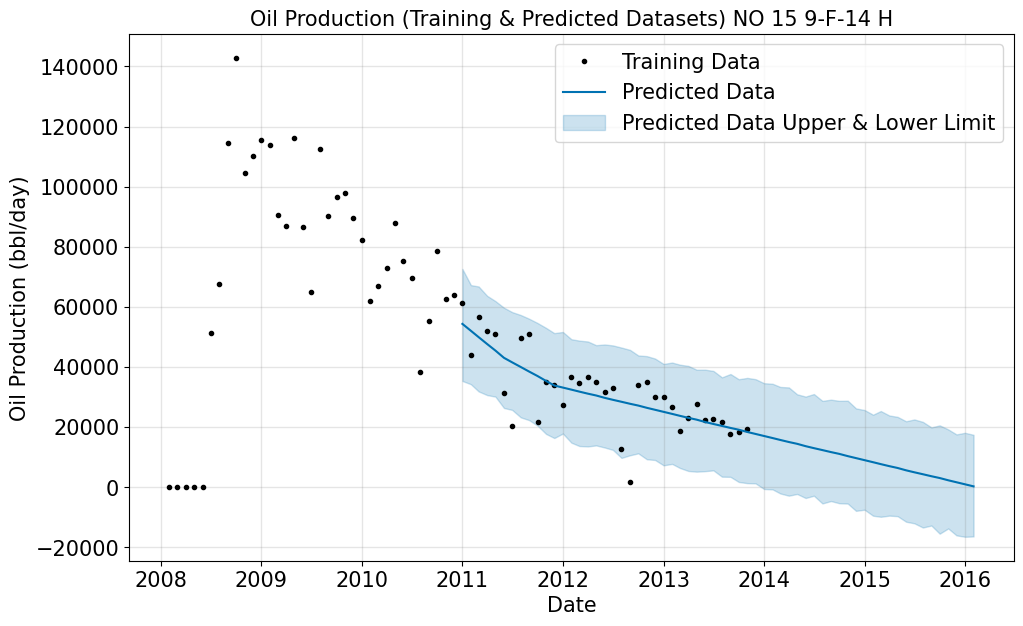

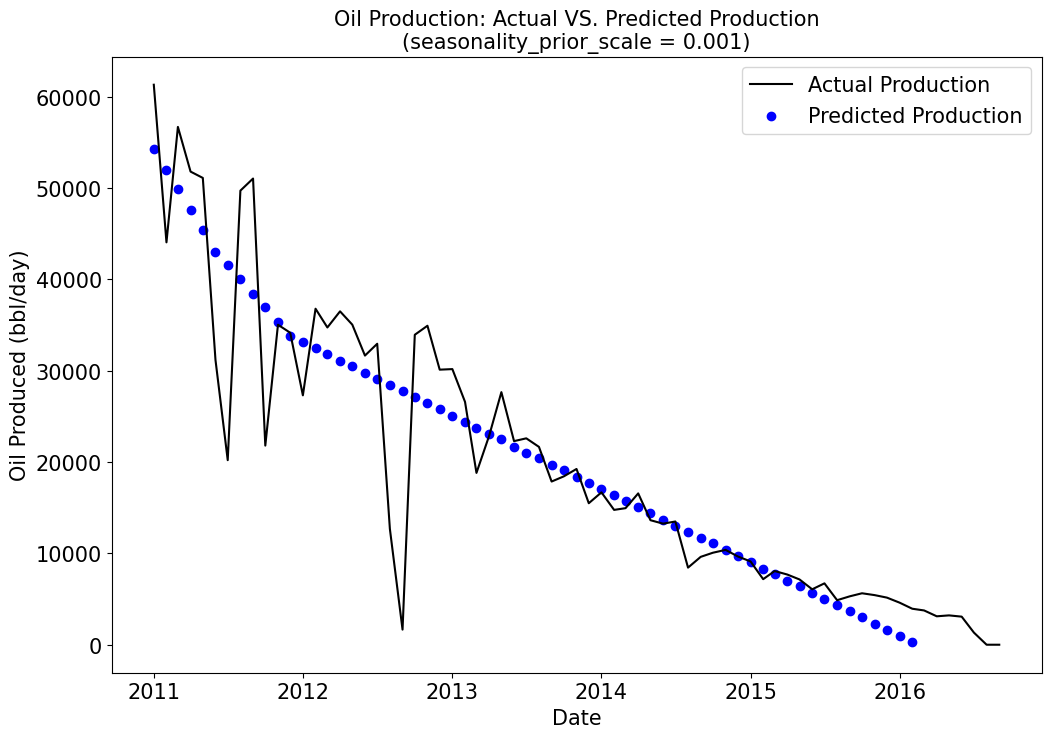

In [88]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt

# Load the data
file_path = 'Volve Well wise data.xlsx'
df_4 = pd.read_excel(file_path, sheet_name="NO 15 9-F-14 H")

# Display the first few rows of the dataframe
print(df_4.head())

# Rename columns to match Prophet's expectations
df_4.rename(columns={'Date': 'ds', 'Oil': 'y'}, inplace=True)

# Ensure the date column is in datetime format
df_4['ds'] = pd.to_datetime(df_4['ds'])

# Display the first few rows to verify the changes
print(df_4.head())

# Initialize and fit the model
model = Prophet(changepoint_prior_scale=1, seasonality_prior_scale=0.001)
model.fit(df_4[:70])

# Prepare for future predictions
future_dates = df_4['ds'][35:].reset_index(drop=True)
future = pd.DataFrame(future_dates)
future.columns = ['ds']
future['ds'] = pd.to_datetime(future['ds'])

# Make predictions
forecast = pd.DataFrame()

for date in future['ds']:
    future_date = pd.DataFrame({'ds': [date]})
    forecast_part = model.predict(future_date)
    
    # Append the forecast_part to the forecast DataFrame
    forecast = pd.concat([forecast, forecast_part], ignore_index=True)
    
    # Check if the predicted value has reached 0
    if forecast_part['yhat'].values[0] <= 0:
        break

# Filter out negative predictions
forecast = forecast[forecast['yhat'] > 0]

# Display the forecasted values
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']])

# Save the forecast to a CSV file
forecast.to_csv('forecast.csv', index=False)

# Plot forecast
plt.figure(figsize=(8,6))
model.plot(forecast)
plt.ylabel('Oil Production (bbl/day)', fontsize=15)
plt.xlabel('Date', fontsize=15)
plt.legend(['Training Data', 'Predicted Data', 'Predicted Data Upper & Lower Limit'], loc='upper right', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title('Oil Production (Training & Predicted Datasets) NO 15 9-F-14 H', fontsize=15)

# Plot Actual vs Predicted production
x1 = forecast['ds']
y1 = forecast['yhat']
y4 = df_4['y'][35:]

plt.figure(figsize=(12,8))
plt.plot(df_4['ds'][35:], y4, label='Actual Production', color='black')
plt.scatter(x1, y1, label='Predicted Production', color='blue')
plt.xlabel('Date', fontsize=15)
plt.ylabel('Oil Produced (bbl/day)', fontsize=15)
plt.legend(loc='upper right', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title('Oil Production: Actual VS. Predicted Production\n(seasonality_prior_scale = 0.001)', fontsize=15)
plt.show()


13:26:14 - cmdstanpy - INFO - Chain [1] start processing
13:26:14 - cmdstanpy - INFO - Chain [1] done processing


        Date      Oil
0 2014-01-01  5674.63
1 2014-02-01  7898.60
2 2014-03-01  7081.47
3 2014-04-01  7163.30
4 2014-05-01  7218.61
          ds        y
0 2014-01-01  5674.63
1 2014-02-01  7898.60
2 2014-03-01  7081.47
3 2014-04-01  7163.30
4 2014-05-01  7218.61
           ds         yhat   yhat_lower   yhat_upper
0  2014-12-01  4304.520827  2427.475058  6356.375786
1  2015-01-01  4145.033625  2187.432090  6000.565152
2  2015-02-01  3985.546424  2000.458002  5916.957375
3  2015-03-01  3841.493468  1937.785890  5789.717182
4  2015-04-01  3682.006267  1720.134700  5671.140497
5  2015-05-01  3527.663814  1617.016070  5369.437389
6  2015-06-01  3368.176613  1559.389975  5361.691019
7  2015-07-01  3213.834160  1132.681750  5013.177907
8  2015-08-01  3054.346958  1091.435674  4925.389644
9  2015-09-01  2894.859757  1024.549138  4885.982884
10 2015-10-01  2740.517304   949.348004  4714.736158
11 2015-11-01  2581.030103   658.208783  4519.823251
12 2015-12-01  2426.687650   426.271168  4442.5

C:\Users\pande\PycharmProjects\Sample_Project_1\env\Lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
C:\Users\pande\PycharmProjects\Sample_Project_1\env\Lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


<Figure size 800x600 with 0 Axes>

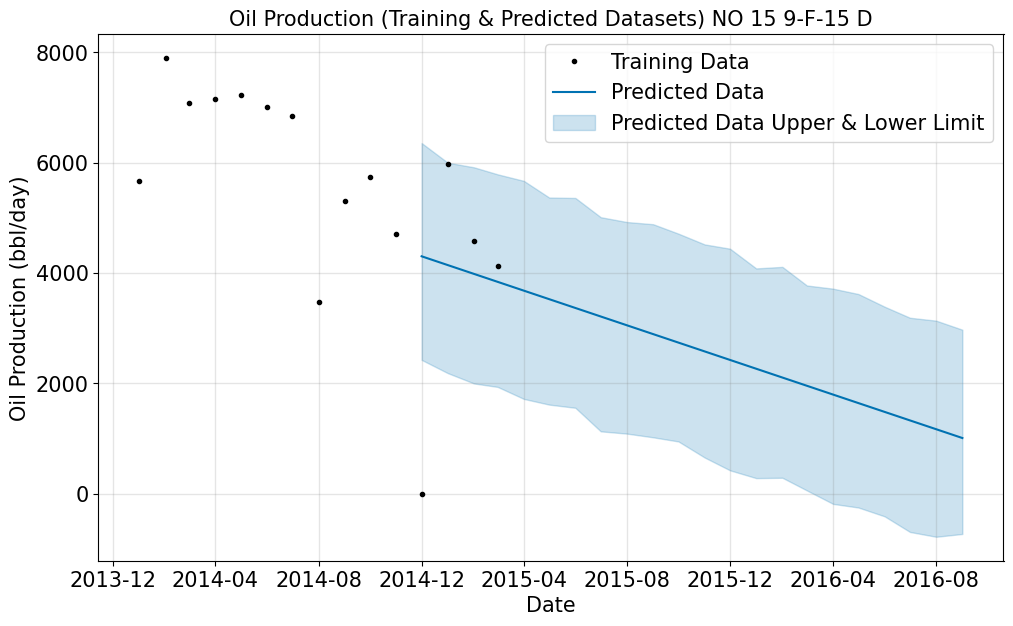

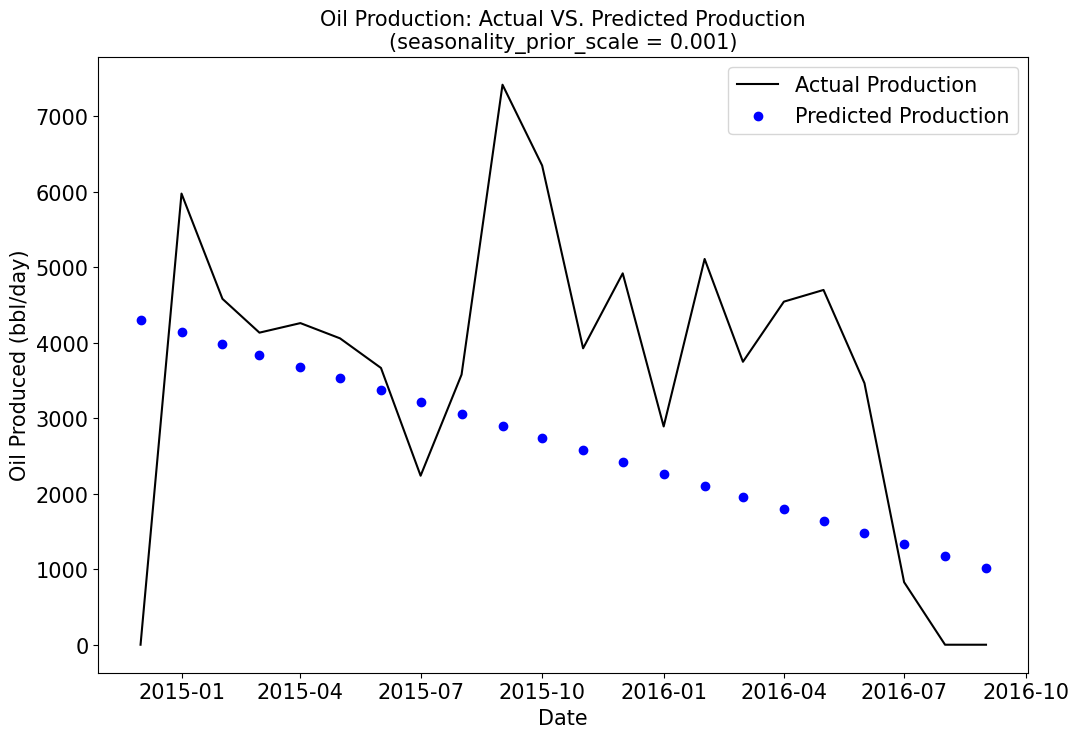

In [89]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt

# Load the data
file_path = 'Volve Well wise data.xlsx'
df_5 = pd.read_excel(file_path, sheet_name="NO 15 9-F-15 D")

# Display the first few rows of the dataframe
print(df_5.head())

# Rename columns to match Prophet's expectations
df_5.rename(columns={'Date': 'ds', 'Oil': 'y'}, inplace=True)

# Ensure the date column is in datetime format
df_5['ds'] = pd.to_datetime(df_5['ds'])

# Display the first few rows to verify the changes
print(df_5.head())

# Initialize and fit the model
model = Prophet(changepoint_prior_scale=1, seasonality_prior_scale=0.001)
model.fit(df_5[:15])

# Prepare for future predictions
future_dates = df_5['ds'][11:].reset_index(drop=True)
future = pd.DataFrame(future_dates)
future.columns = ['ds']
future['ds'] = pd.to_datetime(future['ds'])

# Make predictions
forecast = pd.DataFrame()

for date in future['ds']:
    future_date = pd.DataFrame({'ds': [date]})
    forecast_part = model.predict(future_date)
    
    # Append the forecast_part to the forecast DataFrame
    forecast = pd.concat([forecast, forecast_part], ignore_index=True)
    
    # Check if the predicted value has reached 0
    if forecast_part['yhat'].values[0] <= 0:
        break

# Filter out negative predictions
forecast = forecast[forecast['yhat'] > 0]

# Display the forecasted values
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']])

# Save the forecast to a CSV file
forecast.to_csv('forecast.csv', index=False)

# Plot forecast
plt.figure(figsize=(8,6))
model.plot(forecast)
plt.ylabel('Oil Production (bbl/day)', fontsize=15)
plt.xlabel('Date', fontsize=15)
plt.legend(['Training Data', 'Predicted Data', 'Predicted Data Upper & Lower Limit'], loc='upper right', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title('Oil Production (Training & Predicted Datasets) NO 15 9-F-15 D', fontsize=15)

# Plot Actual vs Predicted production
x1 = forecast['ds']
y1 = forecast['yhat']
y4 = df_5['y'][11:]

plt.figure(figsize=(12,8))
plt.plot(df_5['ds'][11:], y4, label='Actual Production', color='black')
plt.scatter(x1, y1, label='Predicted Production', color='blue')
plt.xlabel('Date', fontsize=15)
plt.ylabel('Oil Produced (bbl/day)', fontsize=15)
plt.legend(loc='upper right', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title('Oil Production: Actual VS. Predicted Production\n(seasonality_prior_scale = 0.001)', fontsize=15)
plt.show()
